# Initializing Essential Libraries And Variables

In [1]:
import numpy as np

import scienceplots 

import matplotlib.pyplot as plt

from numba import njit

from scipy.ndimage import convolve, generate_binary_structure

import itertools


from scipy.interpolate import interp1d
from scipy.optimize import curve_fit


import pandas as pd

plt.style.use(['science','notebook','grid'])

In [2]:
%%html
<style>
.jp-Notebook {
  --jp-notebook-max-width: 98%;
}</style>

In [3]:
N = [22,23,24,25,28]

nu = 1e-7

final_time = 20

lamb = 2

step = 1e-4

tot_step = int(final_time/step)

k_0 = 1/64 


t = np.linspace(0,final_time,num = tot_step,endpoint= True)

norm = 10000

scale = np.array([30,30,0.3,0.02,0.0003])

# (i) Total Energy And Dissipation In Shell Model Plots :

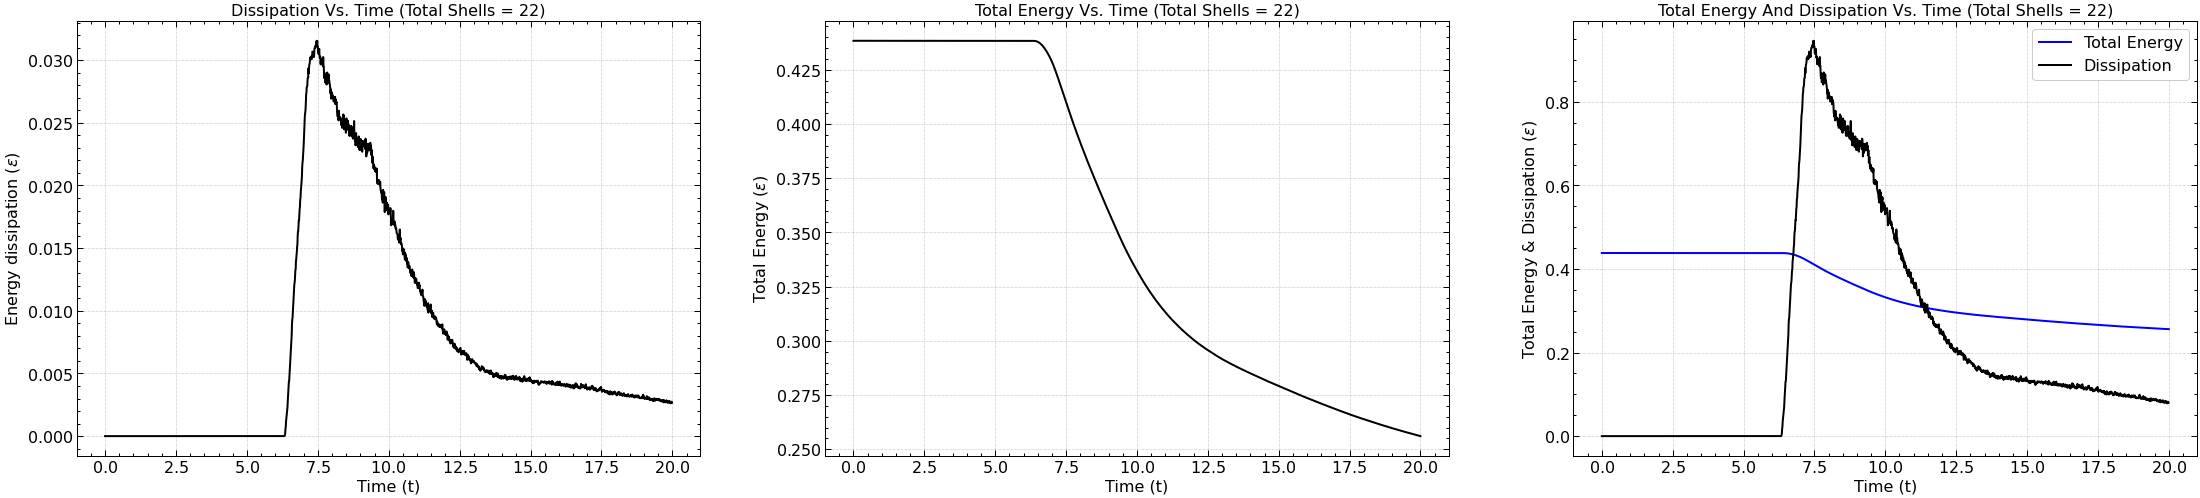

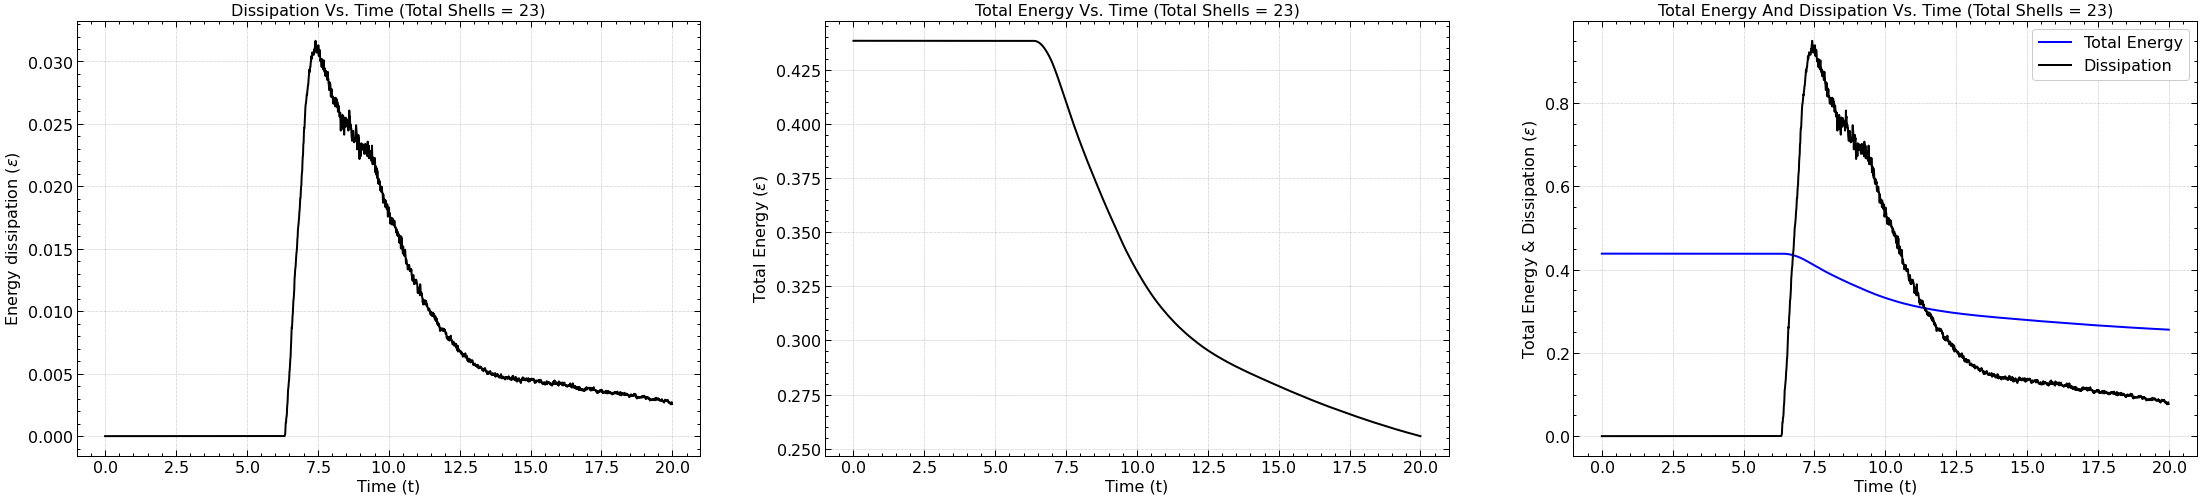

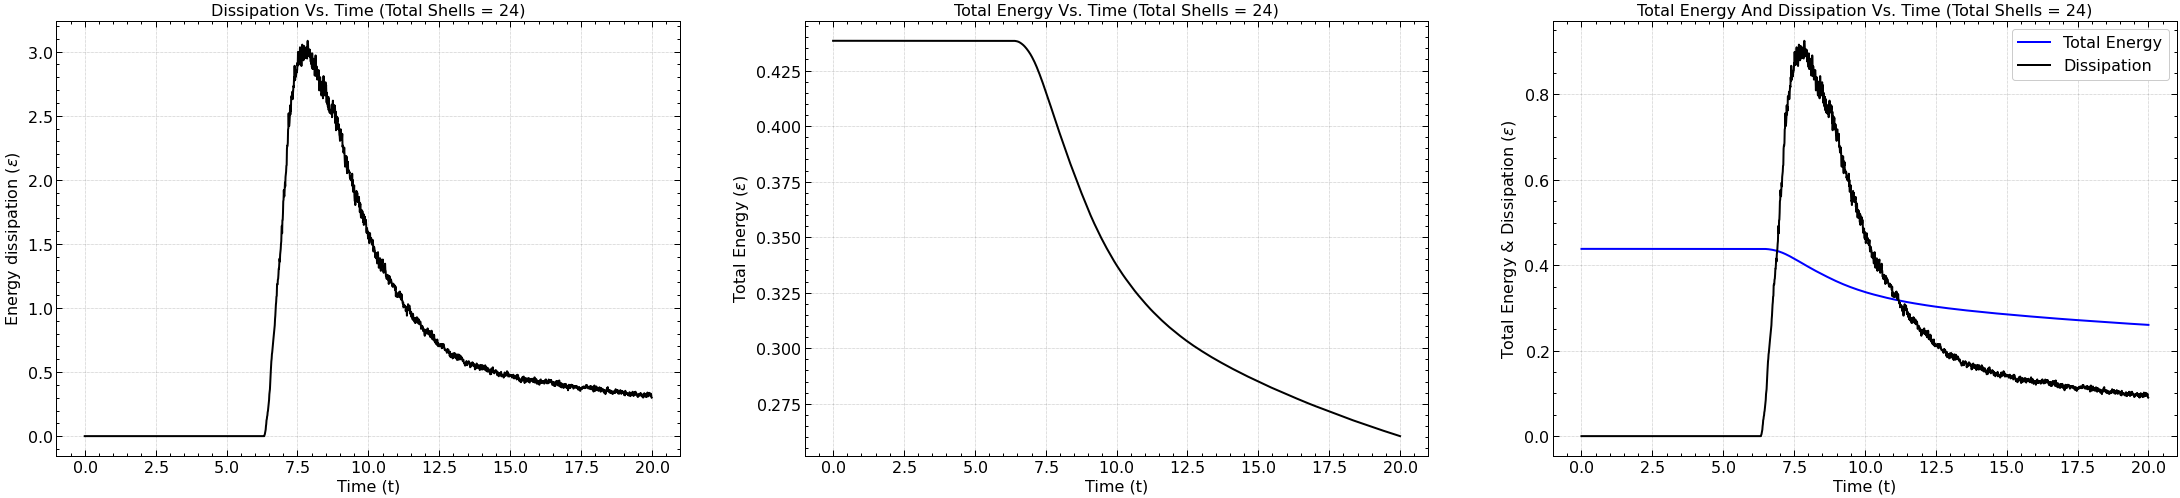

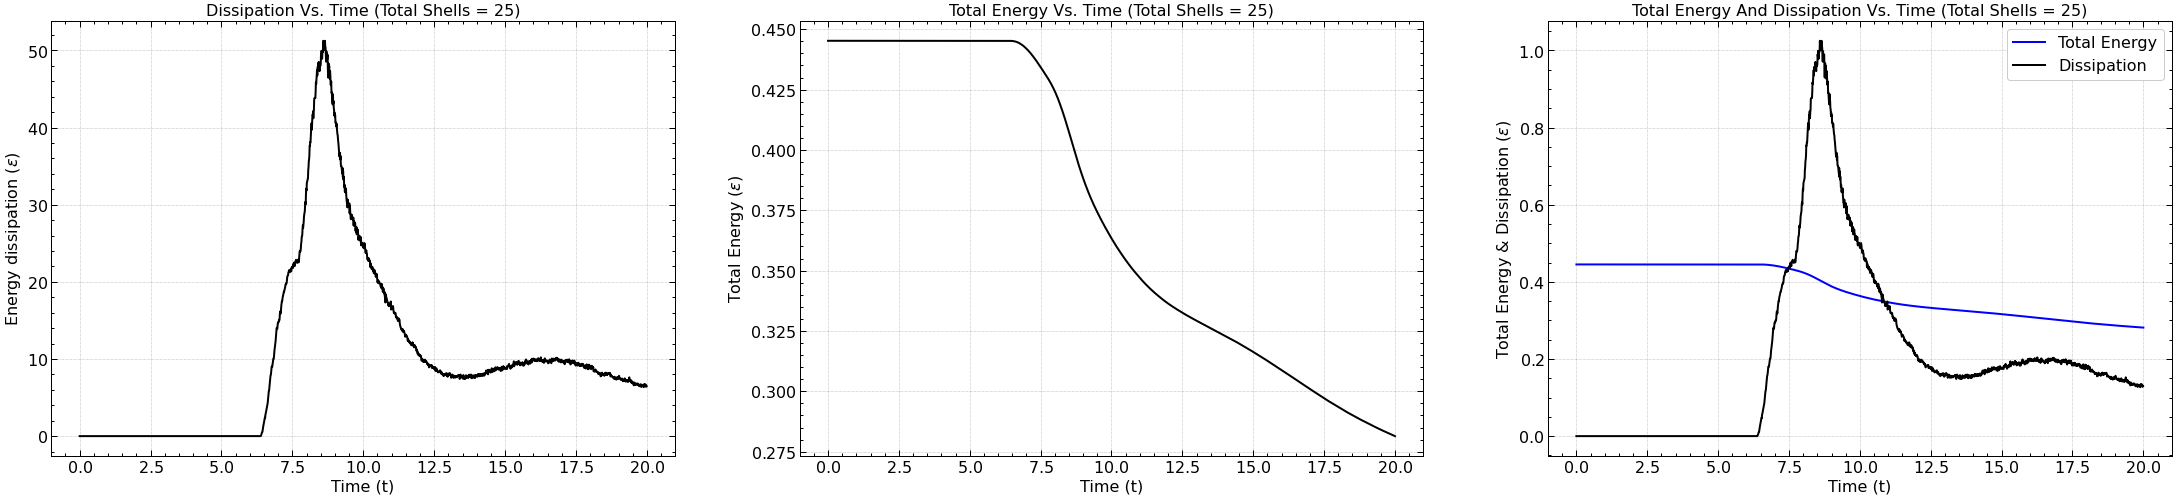

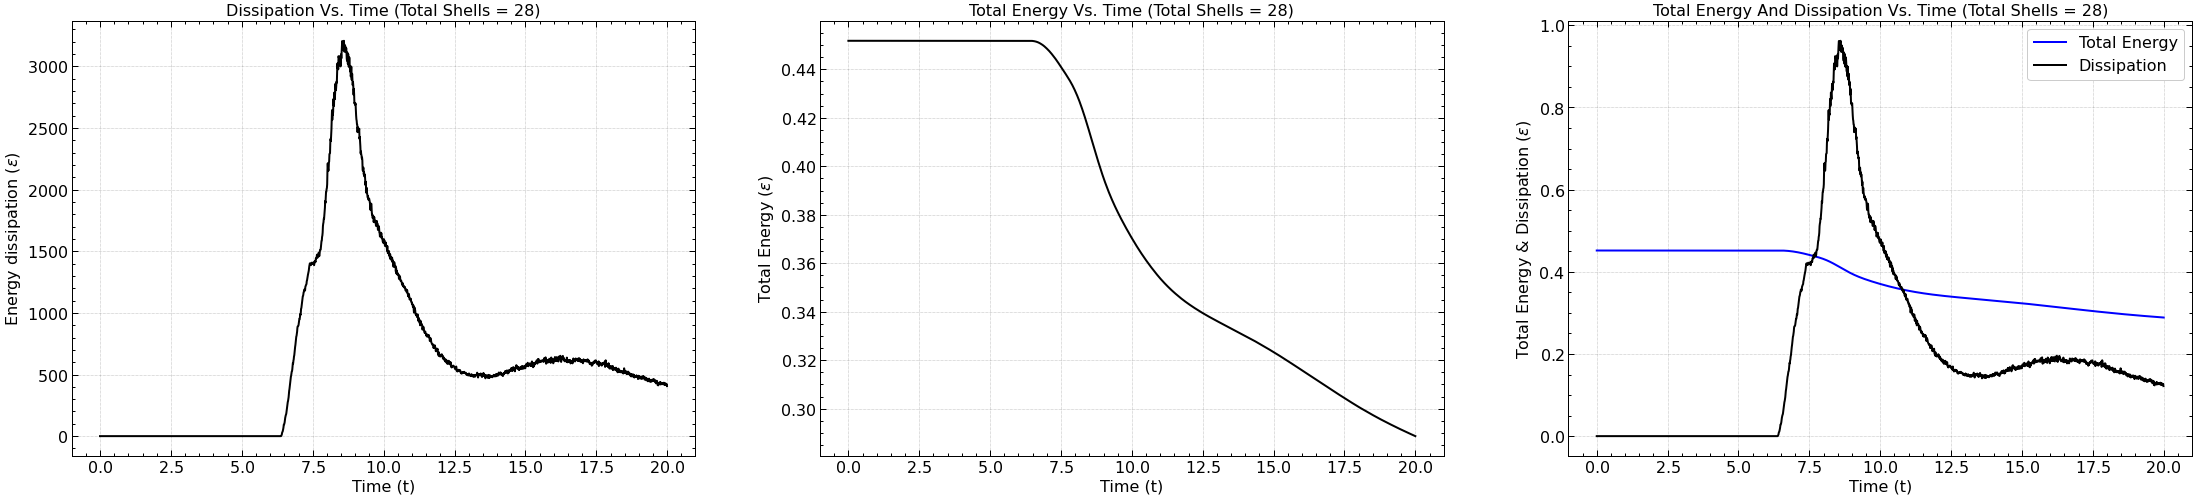

In [5]:
plt.rc('grid', linestyle= ":", color='black')

for i in range(0,5):

    
    figure , axis = plt.subplots(1, 3, figsize = (38,8)) 
     
    final_data = np.load('GOY_shell_Model_'+str(N[i])+'_final_data.npy')
    

    k_n = np.append(k_0,k_0*(lamb**np.arange(1,N[i]+1,dtype = "float64"))) # n = 0,1,2,3,...N


    eps = np.sum(np.real((nu/norm)*(((25*final_data))*(k_n[:,None])**2)),axis = 0)

    axis[0].set_title("Dissipation Vs. Time (Total Shells = "+str(N[i])+")")
    
    axis[0].set_xlabel('Time (t)')
    
    axis[0].set_ylabel(r'Energy dissipation ($\epsilon$)')
        
    axis[0].plot(t[::100],eps[::100] , c = 'black')
    
    
    
    
    
    
    axis[1].plot(t,np.sum(final_data,axis = 0)/norm , c = 'black')
        
    axis[1].set_title("Total Energy Vs. Time (Total Shells = "+str(N[i])+")")
    
    axis[1].set_xlabel('Time (t)')
    
    axis[1].set_ylabel(r'Total Energy ($\epsilon$)')
    
        
    axis[2].plot(t,np.sum(final_data,axis = 0)/norm , c = 'blue',label = "Total Energy")

    axis[2].plot(t[::100],eps[::100]*scale[i] , c = 'black', label = "Dissipation")
    
    axis[2].set_title("Total Energy And Dissipation Vs. Time (Total Shells = "+str(N[i])+")")
    
    axis[2].set_xlabel('Time (t)')
    
    axis[2].set_ylabel(r'Total Energy & Dissipation ($\epsilon$)')

    axis[2].legend()

    plt.savefig('dissp_energy'+str(i)+'.jpg')
    plt.show()



# (ii) (-5/3) - Law Verification of the shell Model From  The Second Order Structure Functions :

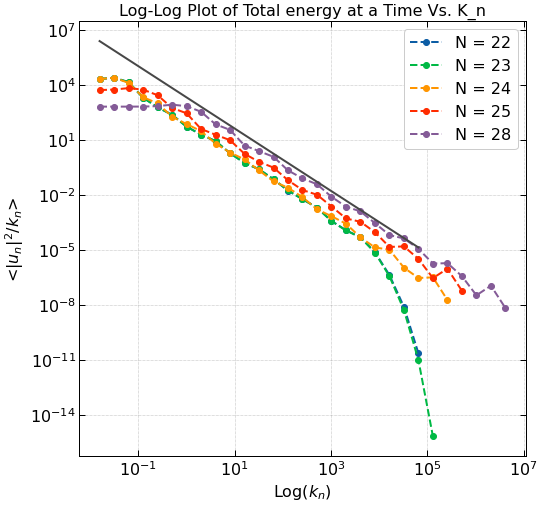

In [7]:
plt.figure(figsize = (8,8))


for i in range(0,5):
    
    
    final_data = np.real(np.load('GOY_shell_Model_'+str(N[i])+'_final_data.npy'))
    

    k_n = np.append(k_0,k_0*(lamb**np.arange(1,N[i]+1,dtype = 'int64'))) # n = 0,1,2,3,...N

    plt.loglog(k_n,final_data[:,-1]/k_n, '.--' , markersize = 12 , label = "N = "+str(N[i]) )
    
    plt.legend()
    
    
k_n = np.append(k_0,k_0*(lamb**np.arange(1,N[0]+1))) # n = 0,1,2,3,...N

plt.xlabel(r'Log($k_n$)')    

plt.ylabel(r'<$ |u_n|^2/k_n$>')    
plt.title("Log-Log Plot of Total energy at a Time Vs. K_n" , size = '16')

plt.loglog(k_n,2000*k_n**(-1.7))
plt.savefig('K41_5_by_3.jpg')
plt.show()

### The black line is reference for the -5/3 slope corresponding to Kolmogorov-41

# (iii) Structure Functions :

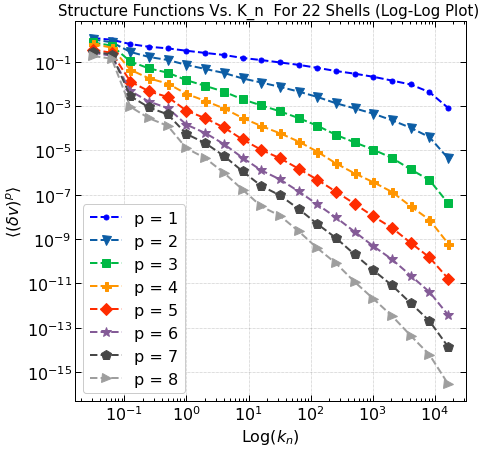

In [8]:
final_data = np.load('GOY_shell_Model_'+str(22)+'_structure_fn.npy')
final_data_2 = np.load('GOY_shell_Model_'+str(22)+'_structure_fn_2.npy')

norm = 50

plt.figure(figsize = (7,7))

k_n = np.append(k_0,k_0*(lamb**np.arange(1,N[0]+1))) # n = 0,1,2,3,...N


plt.loglog(np.real(k_n[1:21]),final_data[0, 1:21]/(19*norm), '.--' , markersize = 10 , label = 'p = 1', color = 'blue')
plt.loglog(np.real(k_n[1:21]),final_data[1, 1:21]/(6*norm), 'v--' , markersize = 9,label = 'p = 2')
plt.loglog(np.real(k_n[1:21]),final_data[2, 1:21]/(2.5*norm), 's--' , markersize = 8, label = 'p = 3')
plt.loglog(np.real(k_n[1:21]),final_data[3, 1:21]/norm, 'P--' , markersize = 9, label = 'p = 4')

plt.loglog(np.real(k_n[1:21]),final_data_2[0, 1:21]/(0.6*norm), 'D--' , markersize = 8 , label = 'p = 5')
plt.loglog(np.real(k_n[1:21]),final_data_2[1, 1:21]/(0.3*norm), '*--' , markersize = 10,label = 'p = 6')
plt.loglog(np.real(k_n[1:21]),final_data_2[2, 1:21]/(0.1*norm), 'p--' , markersize = 10, label = 'p = 7')
plt.loglog(np.real(k_n[1:21]),final_data_2[3, 1:21]/(0.06*norm), '>--' , markersize = 9, label = 'p = 8')


plt.xlabel(r'Log($k_n$)')    

plt.ylabel(r'$\langle (\delta v)^p \rangle$')    


plt.title("Structure Functions Vs. K_n  For 22 Shells (Log-Log Plot) ", size = 15)

plt.legend()

plt.savefig('family_struct.jpg')

plt.show()

# (iv)  $\zeta_p$ : Shell Model Vs. K-41

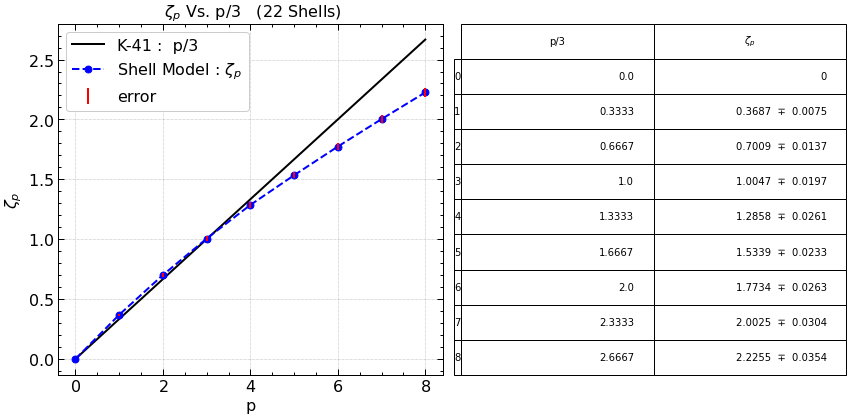

In [9]:
k_n = np.append(k_0,k_0*(lamb**np.arange(1,N[0]+1)))[4:16] # n = 0,1,2,3,...N


plt.rcParams["figure.figsize"] = [12,6]
plt.rcParams["figure.autolayout"] = True



def test(x, a, b):
    
    return a  + (b * x)

param = np.zeros((9,2))

err_param = np.zeros((9,2,2))


param[1,:]  , err_param[1] = curve_fit(test, np.log(k_n), np.log(final_data[0,4:16]))
param[2,:]  , err_param[2] = curve_fit(test, np.log(k_n), np.log(final_data[1,4:16]))
param[3,:]  , err_param[3] = curve_fit(test, np.log(k_n), np.log(final_data[2,4:16]))
param[4,:]  , err_param[4] = curve_fit(test, np.log(k_n), np.log(final_data[3,4:16]))



param[5,:]  , err_param[5] = curve_fit(test, np.log(k_n), np.log(final_data_2[0,4:16]))
param[6,:]  , err_param[6] = curve_fit(test, np.log(k_n), np.log(final_data_2[1,4:16]))
param[7,:]  , err_param[7] = curve_fit(test, np.log(k_n), np.log(final_data_2[2,4:16]))
param[8,:]  , err_param[8] = curve_fit(test, np.log(k_n), np.log(final_data_2[3,4:16]))

param = np.abs(param)

y_err = np.array([ np.sqrt(np.diag(err_param[i])) for i in range (9)])[:,1]

L1 = list(map(str, np.round(param[:,1],4)))
L2 = ['  ∓  ' for i in range(9)]
L3 = list(map(str, np.round(y_err,4)))

res = [i + j + k  for i, j , k in zip(L1 , L2 , L3)]
res[0] = 0

# df = pd.DataFrame({'p':list(map(str , list(np.round(np.array([i for i in range(9)]),4)))) ,'p/3': list(map(str , list(np.round(np.array([i/3 for i in range(9)]),4)))),r'$\zeta_p $': res})
df = pd.DataFrame({'p/3': list(map(str , list(np.round(np.array([i/3 for i in range(9)]),4)))),r'$\zeta_p $': res})


K41 = (1/3)*np.arange(0,9)

fig = plt.figure()

ax1 = fig.add_subplot(121)

ax1.set_xlabel("p")

ax1.set_ylabel(r'$\zeta_p$')

ax1.set_title(r" $\zeta_p$ Vs. p/3   (22 Shells)", size = 16)


ax1.plot(np.arange(0,9),K41,c = 'black', label = r"K-41 :  p/3")

ax1.plot(np.arange(0,9) , param[:,1] , 'o--',color = 'blue' , label = r"Shell Model : $\zeta_p$" , markersize = 6.9)

ax1.errorbar(np.arange(0,9) , param[:,1], yerr = y_err , fmt  = ' ' , color = 'red' , label = 'error')

plt.legend()



ax2 = fig.add_subplot(122)

font_size = 30

bbox = [0, 0, 1, 1]

ax2.axis('off')
mpl_table = ax2.table(cellText = df.values, rowLabels = df.index, bbox=bbox, colLabels=df.columns)

plt.savefig('K41.jpg')

plt.show()

# (v) Multifractal Analysis For Forced Shell Model:-

In [8]:
data_forced_shell = np.load('GOY_shell_Model_22_forced_avg_over_1000_times_over_200_sec.npy')
nu = 1e-7 
k_0 = 1/16 + 0J
lamb = 2
N = 22
#Time 
step = 1e-4
final_time = 200
each_realization = 250

tot_step = int(final_time/step)
t = np.linspace(0,final_time,num = tot_step,endpoint= True)
k_n = np.append(k_0,k_0*(lamb**np.arange(1,N+1,dtype = "float64"))) # n = 0,1,2,3,...N

eps = np.sum(np.real(nu*(((data_forced_shell/(each_realization)))*(k_n[:,None])**2)),axis = 0)

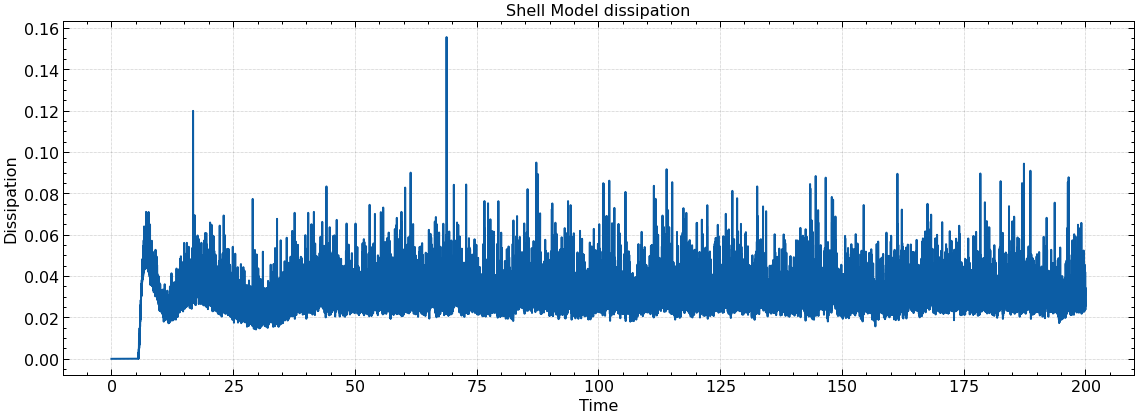

In [9]:
plt.figure(figsize  = (16,6))
plt.xlabel("Time")
plt.ylabel("Dissipation")
plt.title("Shell Model dissipation")
plt.plot(t,eps)
plt.savefig("forces_shell_tot.jpg")
plt.show()

In [10]:
eps_final = eps[int(len(eps)/2):]
t_final  = t[int(len(eps)/2):]

tot_points = int(len(eps)/2)

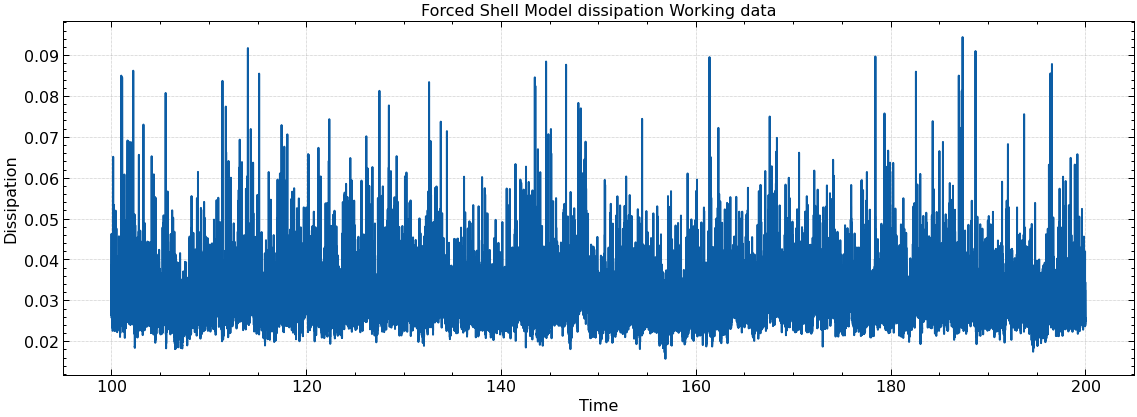

In [16]:
plt.figure(figsize  = (16,6))
plt.xlabel("Time")
plt.ylabel("Dissipation")
plt.title("Forced Shell Model dissipation Working data")
plt.plot(t_final,eps_final)
plt.savefig('forced_shell_working.jpg')
plt.show()

In [12]:
%%time

r = 50*np.arange(1,11, dtype = int)


q  = np.linspace(-10,10,100,endpoint = True)
# plt.xlim(0.955,1.045)
# plt.ylim(0.9,1.1)

Z_r_q = np.zeros((len(r),len(q)))

for i in range(len(r)):

    for j in range(len(q)):

        for k  in range(int(tot_points/r[i])-1):
            
            Z_r_q[i,j] =  Z_r_q[i,j]  +  (np.mean(eps_final[r[i]*k:r[i]*(k+1)])*(r[i]))**q[j]     # (TOTAL DISSIPATION IN EACH BOX.)**q  

CPU times: user 42.6 s, sys: 88.9 ms, total: 42.7 s
Wall time: 42.7 s


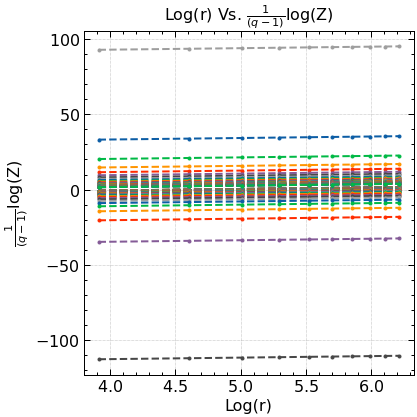

In [13]:
plt.figure(figsize = (6,6))
plt.title(r'Log(r) Vs. $\frac{1}{(q-1)}$log(Z)')
plt.xlabel("Log(r)")
plt.ylabel(r'$\frac{1}{(q-1)}$log(Z)')
for i in range(len(q)):
    plt.plot(np.log(r),np.log(Z_r_q[:,i])/(q[i]-1),'.--')

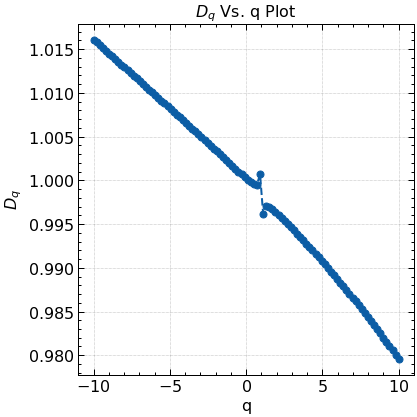

In [14]:
def linear(x,a,b):
    return a*x + b
D_q = np.zeros((len(q),2))
for i in range(len(q)):
    D_q[i, :] , _  = curve_fit(linear , np.log(r) , np.log(Z_r_q[:,i])/(q[i]-1 ))



plt.figure(figsize = (6,6))

plt.xlabel("q")
plt.ylabel(r'$D_q$')
plt.title(r'$D_q$ Vs. q Plot')
plt.plot(q,D_q[:,0],'.--', markersize = 14)
plt.savefig("D_q_vs_q.jpg")
plt.show()

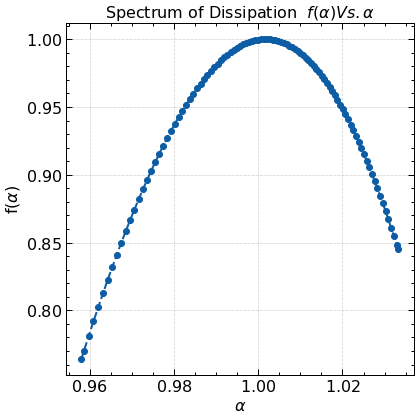

In [15]:
alpha = np.gradient(D_q[:,0]*(q-1),q)

f_alpha = alpha*q - D_q[:,0]*(q-1)

plt.figure(figsize = (6,6))

plt.plot(alpha,f_alpha,'o--')

# plt.xlim(0.955,1.045)
# plt.ylim(0.9,1.1)

plt.ylabel(r'f($\alpha$)')

plt.xlabel(r'$\alpha$')
plt.title(r'Spectrum of Dissipation  $f(\alpha)  Vs. \alpha$')
plt.savefig("Spectrum.jpg")
plt.show()

# धन्यवाद
# ধন্যবাদ